## Algoritmo: Diagnóstico de TEPT

In [1]:
import pandas as pd
import numpy as np

# Importação das bibliotecas que serão utilizadas.

In [3]:
tept_dataset = pd.read_csv('tept_dataset.csv')

# Importa arquivo csv com o dataset.

In [4]:
tept_dataset.shape

# Exibe número total de observações e atributos do dataset.

(50000, 27)

In [5]:
tept_dataset.columns

# Exibe os nomes das colunas do dataset.

Index(['id', 'a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3', 'b4', 'b5', 'c1', 'c2',
       'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'e1', 'e2', 'e3', 'e4', 'e5',
       'e6', 'tept', 'resultado'],
      dtype='object')

In [6]:
tept_dataset.info()

# Exibe um resumo dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50000 non-null  int64 
 1   a1         50000 non-null  int64 
 2   a2         50000 non-null  int64 
 3   a3         50000 non-null  int64 
 4   a4         50000 non-null  int64 
 5   b1         50000 non-null  int64 
 6   b2         50000 non-null  int64 
 7   b3         50000 non-null  int64 
 8   b4         50000 non-null  int64 
 9   b5         50000 non-null  int64 
 10  c1         50000 non-null  int64 
 11  c2         50000 non-null  int64 
 12  d1         50000 non-null  int64 
 13  d2         50000 non-null  int64 
 14  d3         50000 non-null  int64 
 15  d4         50000 non-null  int64 
 16  d5         50000 non-null  int64 
 17  d6         50000 non-null  int64 
 18  d7         50000 non-null  int64 
 19  e1         50000 non-null  int64 
 20  e2         50000 non-null  i

In [7]:
tept_dataset["tept"].value_counts()

# Frequência de casos positivos e negativos de TEPT, identificados como sim e não, respectivamente.

sim    28538
não    21462
Name: tept, dtype: int64

In [9]:
tept_dataset["tept"].value_counts(normalize=True)*100

# Percentual de casos positivos e negativos de TEPT, identificados como sim e não, respectivamente.

sim    57.076
não    42.924
Name: tept, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Importação das bibliotecas que serão utilizadas.

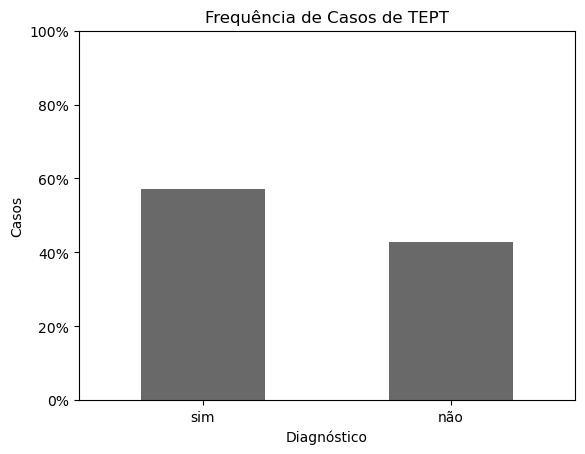

In [18]:
tept_dataset["tept"].value_counts(normalize=True).plot(kind="bar", color="dimgrey");

# Cria um gráfico de barras com os dados da coluna tept.

plt.title("Frequência de Casos de TEPT")
plt.xlabel("Diagnóstico")
plt.ylabel("Casos")
plt.xticks(rotation=0)

# Título do gráfico, identificação dos eixos e configuração na vertical.

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().set_ylim(0, 1)  

# Configura o eixo y para exibir no formato de porcentagem;
# Define os limites do eixo y de 0 a 1 (0% a 100%).

plt.show()

# Exibe o gráfico.

In [19]:
X = tept_dataset.drop(["id", "tept", "resultado"], axis=1)
y = tept_dataset["resultado"]

# Armazena em X as colunas do dataset, exceto id, tept e resultado;
# Armazena em y a coluna resultado que será utilizada como rótulo.

In [20]:
X.info()

# Exibe as 24 variáveis (critérios diagnósticos para TEPT) armazenadas em X.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a1      50000 non-null  int64
 1   a2      50000 non-null  int64
 2   a3      50000 non-null  int64
 3   a4      50000 non-null  int64
 4   b1      50000 non-null  int64
 5   b2      50000 non-null  int64
 6   b3      50000 non-null  int64
 7   b4      50000 non-null  int64
 8   b5      50000 non-null  int64
 9   c1      50000 non-null  int64
 10  c2      50000 non-null  int64
 11  d1      50000 non-null  int64
 12  d2      50000 non-null  int64
 13  d3      50000 non-null  int64
 14  d4      50000 non-null  int64
 15  d5      50000 non-null  int64
 16  d6      50000 non-null  int64
 17  d7      50000 non-null  int64
 18  e1      50000 non-null  int64
 19  e2      50000 non-null  int64
 20  e3      50000 non-null  int64
 21  e4      50000 non-null  int64
 22  e5      50000 non-null  int64
 23  e6      500

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importação das bibliotecas que serão utilizadas.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide o dataset em conjuntos de treinamento (80%) e teste (20%), considerando a definição de X e y feita anteriormente.

In [24]:
len(X_train), len(y_train)

# Exibe total de observações selecionadas para treino.

(40000, 40000)

In [25]:
len(X_test), len(y_test)

# Exibe total de observações selecionadas para teste.

(10000, 10000)

In [26]:
model = LogisticRegression()

# Define o modelo de regressão logística.

In [27]:
model.fit(X_train, y_train)

# Treina o modelo com os dados de treinamento.

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)

# Faz previsões com os dados de teste e armazena o resultado (em uma array) na variável y_pred.

In [46]:
print(y_pred)

# Exibe array com as previsões atribuídas à y_pred.

[0 0 0 ... 0 1 1]


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Avalia e exibe a precisão do modelo treinado (acurácia).

Accuracy: 0.8181


In [48]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Cria e exibe uma matriz de confusão (avaliação do desempenho do modelo em relação a cada classe real e prevista).

Confusion Matrix:
[[3293 1032]
 [ 787 4888]]


In [49]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Cria e exibe um relatório de classificação com métricas de desempenho referentes a cada classe e ao modelo.

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4325
           1       0.83      0.86      0.84      5675

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000

